In [1]:
%matplotlib widget

# Analysis and Inversion of ERT measurements

Note: Use data files in the form `ERT*_clean.Dat`.
This files were denoised manually in `ProsysII` and saved in `Res2dinv` data format
Original files are in folder `ERT_data`

In [2]:
# Import libraries
import pygimli as pg
from pygimli.physics import ert
import matplotlib.pyplot as plt
import numpy as np

### Import data

In [3]:
# Import data for a specific line

data = ert.load('../ERT_data/Res2dInv_Format/ERT4_clean.Dat', load=True, verbose=True)
data

13/04/24 - 14:03:07 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 72 data: 2702, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

## Review data

In [4]:
# Create geometric factors

data['k'] = ert.createGeometricFactors(data, numerical=True)

13/04/24 - 14:03:07 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.


ModellingBase::setMesh() copying new mesh ... Found datafile: 72 electrodes


13/04/24 - 14:03:14 - pyGIMLi - INFO - Save RVector binary
13/04/24 - 14:03:14 - pyGIMLi - INFO - Cache stored: /home/mariacarrizo/.cache/pygimli/1399798767043033621


Found: 72 node-electrodes
rMin = 0.25, rMax = 71
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.0276383 s
FOP updating mesh dependencies ... 6.4e-06 s
Forward: time: 6.21909s


In [5]:
# Create the ERT data manager

mgr = ert.ERTManager(sr=False)

13/04/24 - 14:03:14 - pyGIMLi - INFO - Save RVector binary
13/04/24 - 14:03:14 - pyGIMLi - INFO - Cache stored: /home/mariacarrizo/.cache/pygimli/4216413677858827797


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7fe37560f850>)

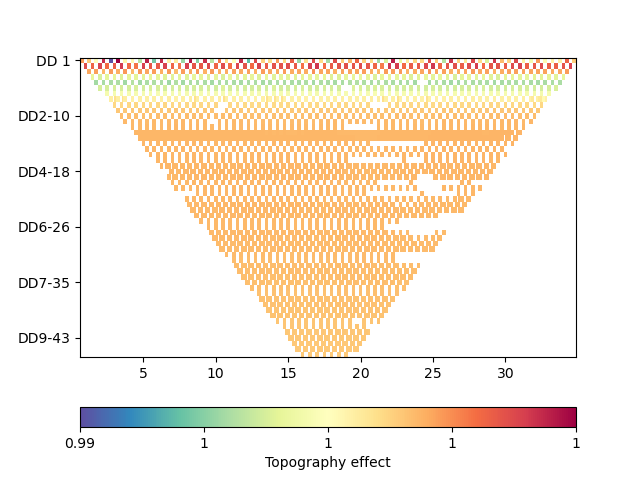

In [6]:
# Review data values

k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')

In [7]:
# Check that data is OK

mgr.checkData(data)
print(data)

Data: Sensors: 72 data: 2702, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'rhoa', 'valid']


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7fe35eaf2010>)

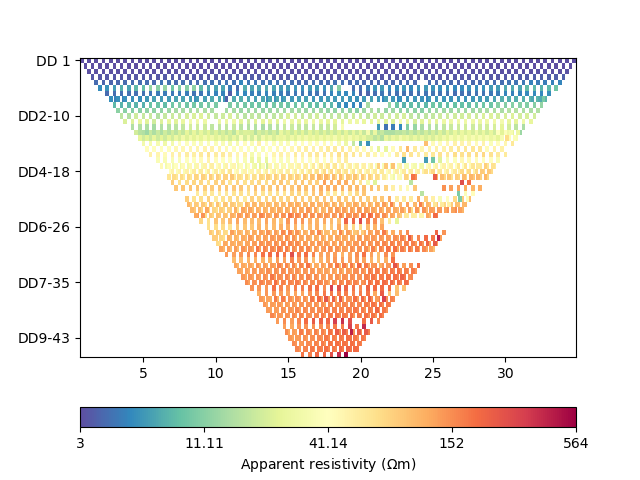

In [8]:
# Check data errors

data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

## Start inversion and Show Results

Note: Around 10 minutes computing

In [9]:
mod = mgr.invert(data, lam=100, verbose=False,
                 paraDX=0.3, paraMaxCellSize=10, paraDepth=7, quality=33.6)

13/04/24 - 14:03:15 - pyGIMLi - INFO - Found 2 regions.
13/04/24 - 14:03:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/04/24 - 14:03:15 - pyGIMLi - INFO - Found 2 regions.
13/04/24 - 14:03:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/04/24 - 14:03:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/04/24 - 14:03:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/04/24 - 14:03:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5173 Cells: 9832 Boundaries: 7630
13/04/24 - 14:03:15 - pyGIMLi - INFO - Use median(data values)=0.97
13/04/24 - 14:03:15 - pyGIMLi - INFO - Created startmodel from forward operator: 1949, min/max=0.970000/0.970000


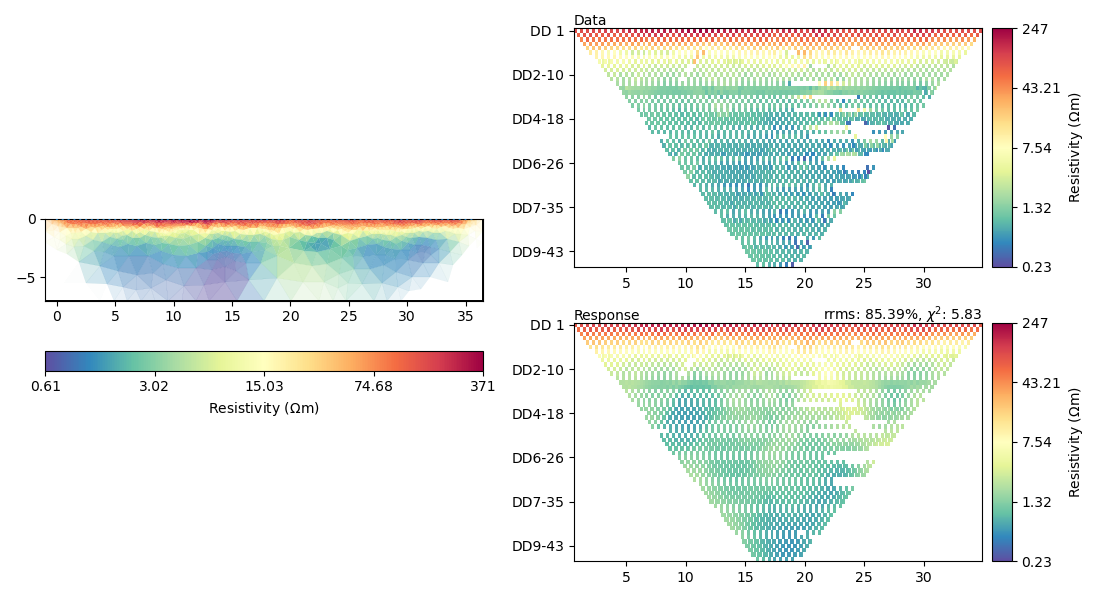

In [10]:
mgr.showResultAndFit()
plt.savefig('figures/ERT4')

13/04/24 - 14:05:32 - pyGIMLi - INFO - Saving inversion results to: results/ERT4/ERTManager


('results/ERT4/ERTManager', <Figure size 1600x1000 with 2 Axes>, <Axes: >)

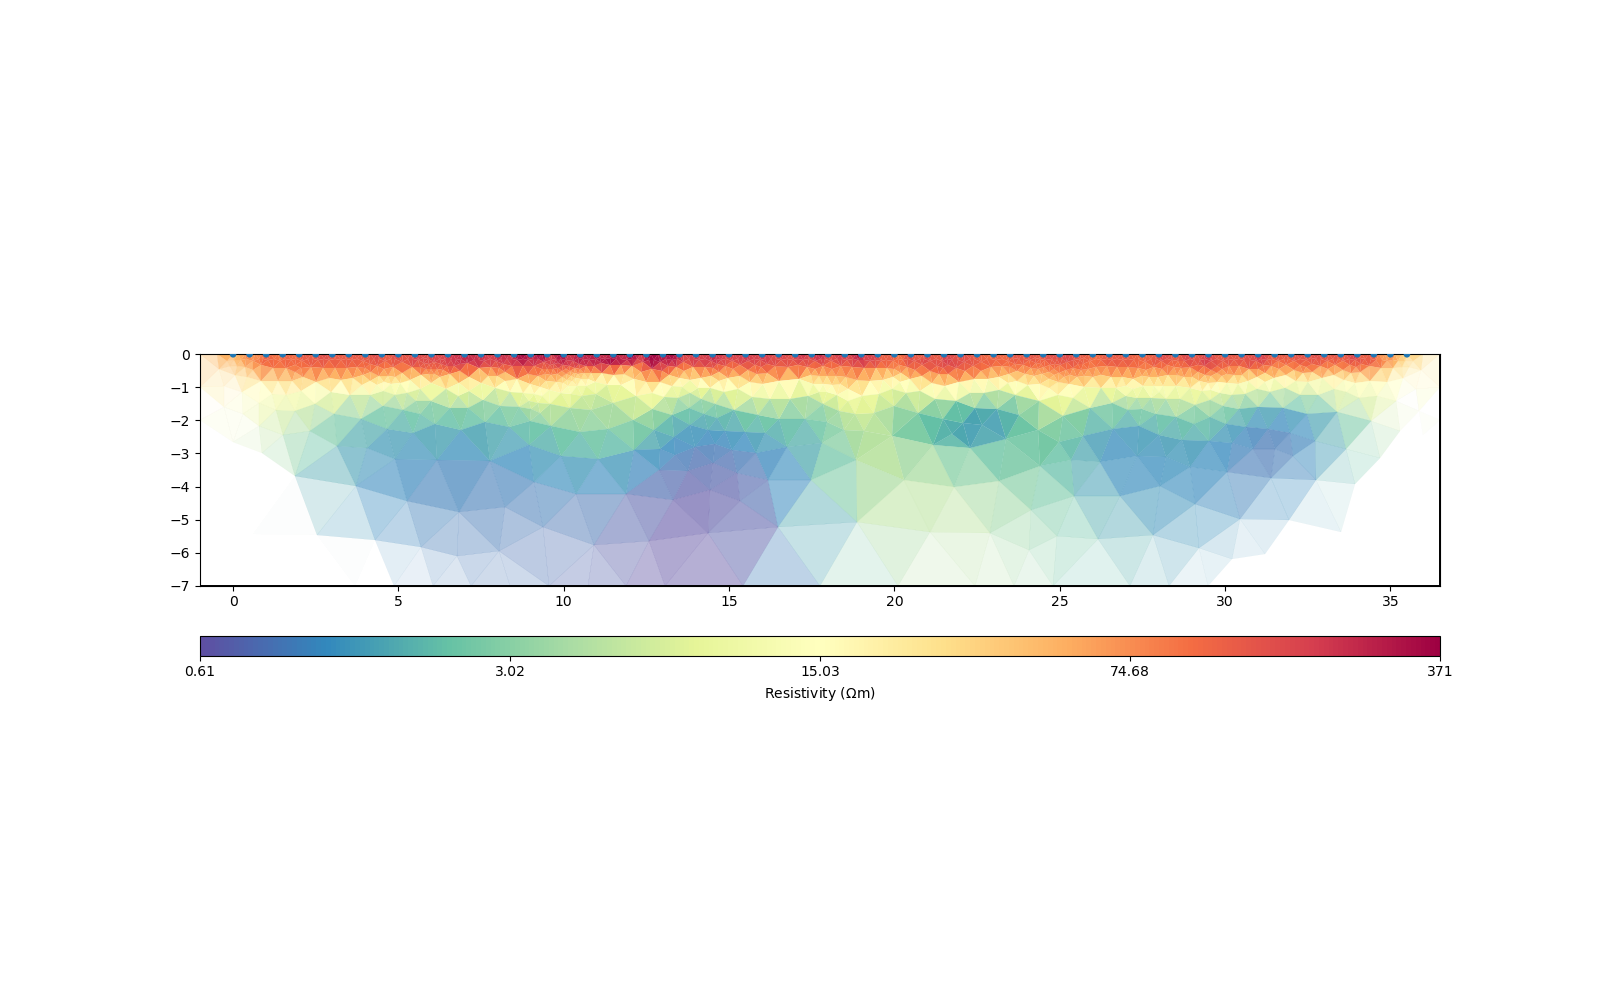

In [11]:
# Save Results
mgr.saveResult('results/ERT4')